This notebook provides a preliminary overview of the publications that are retrieved by querying (1) the keywords section and  (2) the keywords section, titles, and abstracts.

! add reminder of used keywords and their here used abbreviations !

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import matplotlib as mpl

# Fonts for plots
mpl.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.family'] = 'serif'

pd.set_option('display.max_columns', None)

path = "C:/Users/kleinow/ownCloud/MA_Neuro"

Import of queried keyword data sets from the KB sql database

In [34]:
bionn = pd.read_csv(path + '/bionn.csv')
brainm = pd.read_csv(path + '/brainm.csv')
compn = pd.read_csv(path + '/compn.csv')
compns = pd.read_csv(path + '/compns.csv')
compp = pd.read_csv(path + '/compp.csv')
conne = pd.read_csv(path + '/conne.csv')
hhm = pd.read_csv(path + '/hhm.csv')
ndyn = pd.read_csv(path + '/ndyn.csv')
ninfo = pd.read_csv(path + '/ninfo.csv')
popc = pd.read_csv(path + '/popc.csv')
stdp = pd.read_csv(path + '/stdp.csv')

In [35]:
rows = {
    'DataFrame': ['bionn', 'brainm', 'compn', 'compns', 'compp', 'conne', 'hhm', 'ndyn', 'ninfo', 'popc', 'stdp'],
    'Rows': [bionn.shape[0], brainm.shape[0], compn.shape[0], compns.shape[0], compp.shape[0], conne.shape[0], hhm.shape[0], ndyn.shape[0], ninfo.shape[0], popc.shape[0], stdp.shape[0]]
}

df_rows = pd.DataFrame(rows)

# Display the table
print(df_rows) 
# maybe still ditch brain models
# compns has to be included due to often interchanged use of the terms

   DataFrame  Rows
0      bionn   729
1     brainm    61
2      compn   678
3     compns    11
4      compp   320
5      conne   401
6        hhm   221
7       ndyn   247
8      ninfo   317
9       popc   307
10      stdp   254


Combine computational neuroscience(s)

In [36]:
compn = pd.concat([compn, compns], ignore_index=True)

compn.drop_duplicates(keep='first', inplace=True) # Drop duplicate rows
compn.reset_index(drop=True, inplace=True)

#compn

Total numbers of publications per keyword

In [37]:
#(alternative to above)
base_names = ['bionn', 'brainm', 'compn', 'compp', 'conne', 'hhm', 'ndyn', 'ninfo', 'popc', 'stdp']
df_lengths = []

for name in base_names:
    length = len(globals()[name])
    df_lengths.append((name, length))

length_df = pd.DataFrame(df_lengths, columns=['DataFrame', 'Length'])

print(length_df)

  DataFrame  Length
0     bionn     729
1    brainm      61
2     compn     689
3     compp     320
4     conne     401
5       hhm     221
6      ndyn     247
7     ninfo     317
8      popc     307
9      stdp     254


Earliest and latest publication for each keyword

In [38]:
#print("Highest value in 'cit_all_years':", compn['pubyear'].max())
#print("Lowest value in 'cit_all_years':", compn['pubyear'].min())

df_years = []

for name in base_names:
    min_year = globals()[name]['pubyear'].min()
    max_year = globals()[name]['pubyear'].max()
    df_years.append((name, min_year, max_year))

year_range_df = pd.DataFrame(df_years, columns=['DataFrame', 'Min_Year', 'Max_Year'])

print(year_range_df)

  DataFrame  Min_Year  Max_Year
0     bionn      1994      2023
1    brainm      1993      2022
2     compn      1992      2022
3     compp      2007      2022
4     conne      1990      2022
5       hhm      1991      2022
6      ndyn      1993      2022
7     ninfo      1999      2022
8      popc      1991      2022
9      stdp      2002      2022


Most cited publications

In [39]:
#compn.loc[compn['cit_all_years'].idxmax()]

df_max_cit = []

for name in base_names:
    df = globals()[name]
    max_cit_row = df[df['cit_all_years'] == df['cit_all_years'].max()]
    max_cit_info = (name, max_cit_row['item_title'].values[0], max_cit_row['first_author'].values[0], max_cit_row['cit_all_years'].values[0])
    df_max_cit.append(max_cit_info)

max_cit_df = pd.DataFrame(df_max_cit, columns=['DataFrame', 'Item_Title', 'First_Author', 'Max_Citations'])

pd.set_option('display.max_colwidth', None)

print(max_cit_df)

pd.reset_option('display.max_colwidth') #reset to default

  DataFrame  \
0     bionn   
1    brainm   
2     compn   
3     compp   
4     conne   
5       hhm   
6      ndyn   
7     ninfo   
8      popc   
9      stdp   

                                                                                                  Item_Title  \
0                                EEG Emotion Recognition Using Dynamical Graph Convolutional Neural Networks   
1                                                     Large-scale model of mammalian thalamocortical systems   
2                                    Analysis of EEG records in an epileptic patient using wavelet transform   
3                                                                 Interoception and Mental Health: A Roadmap   
4                                                      CHARACTERISTICS OF DISSOCIABLE HUMAN LEARNING-SYSTEMS   
5                   A model of the action potential and underlying membrane currents in a rabbit atrial cell   
6                    Self-organization, free energ

Overview of publications over the years

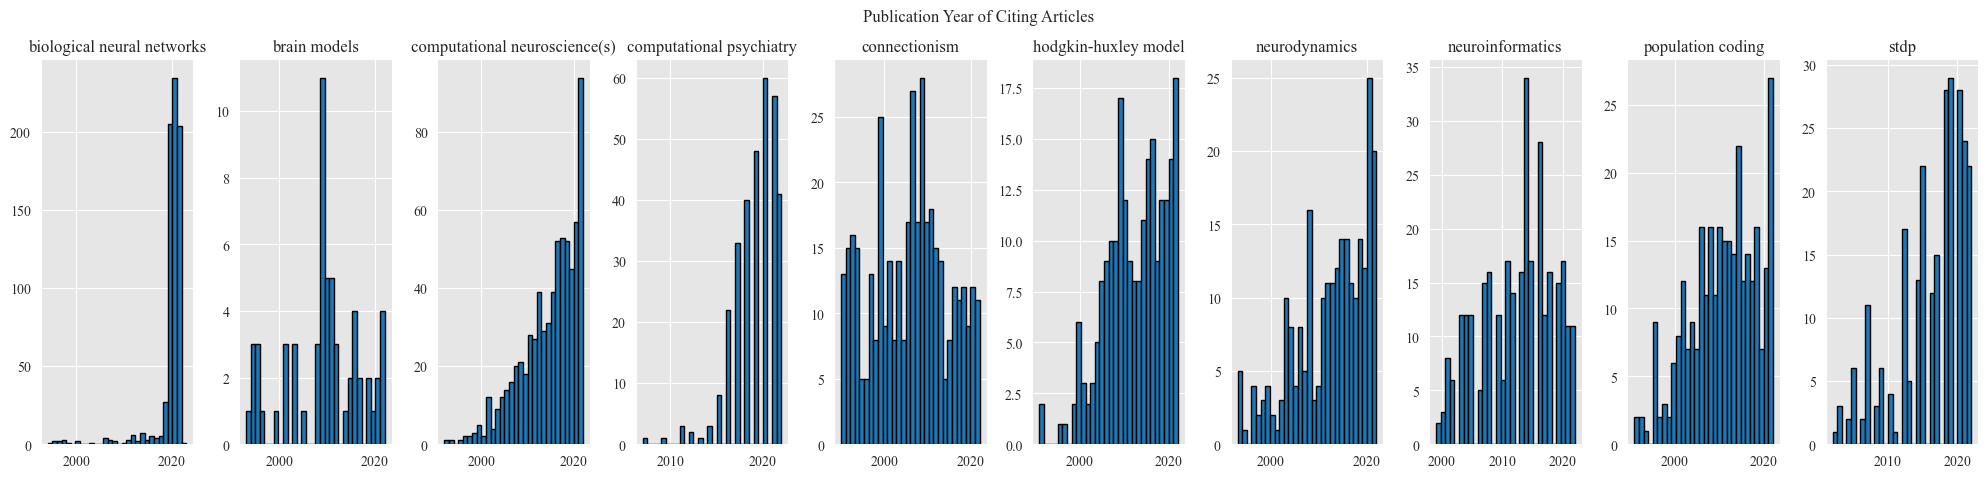

In [40]:
fig, axs = plt.subplots(1, 10, figsize=(25, 5))

# List of df names and corresponding df 
df_list = [
    ('biological neural networks', bionn),
    ('brain models', brainm),
    ('computational neuroscience(s)', compn),
    #('compns', compns),
    ('computational psychiatry', compp),
    ('connectionism', conne),
    ('hodgkin-huxley model', hhm),
    ('neurodynamics', ndyn),
    ('neuroinformatics', ninfo),
    ('population coding', popc),
    ('stdp', stdp)
]

# Plot histograms for each df in subplot
for i, (name, df) in enumerate(df_list):
    df.hist(column='pubyear', bins=30, ax=axs[i], edgecolor='black', sharey=True) # Remove sharey and sharex if needed
    axs[i].set_title(name)

# Overall title
fig.suptitle('Publication Year of Citing Articles')

plt.show()

Add shared axes to subplots

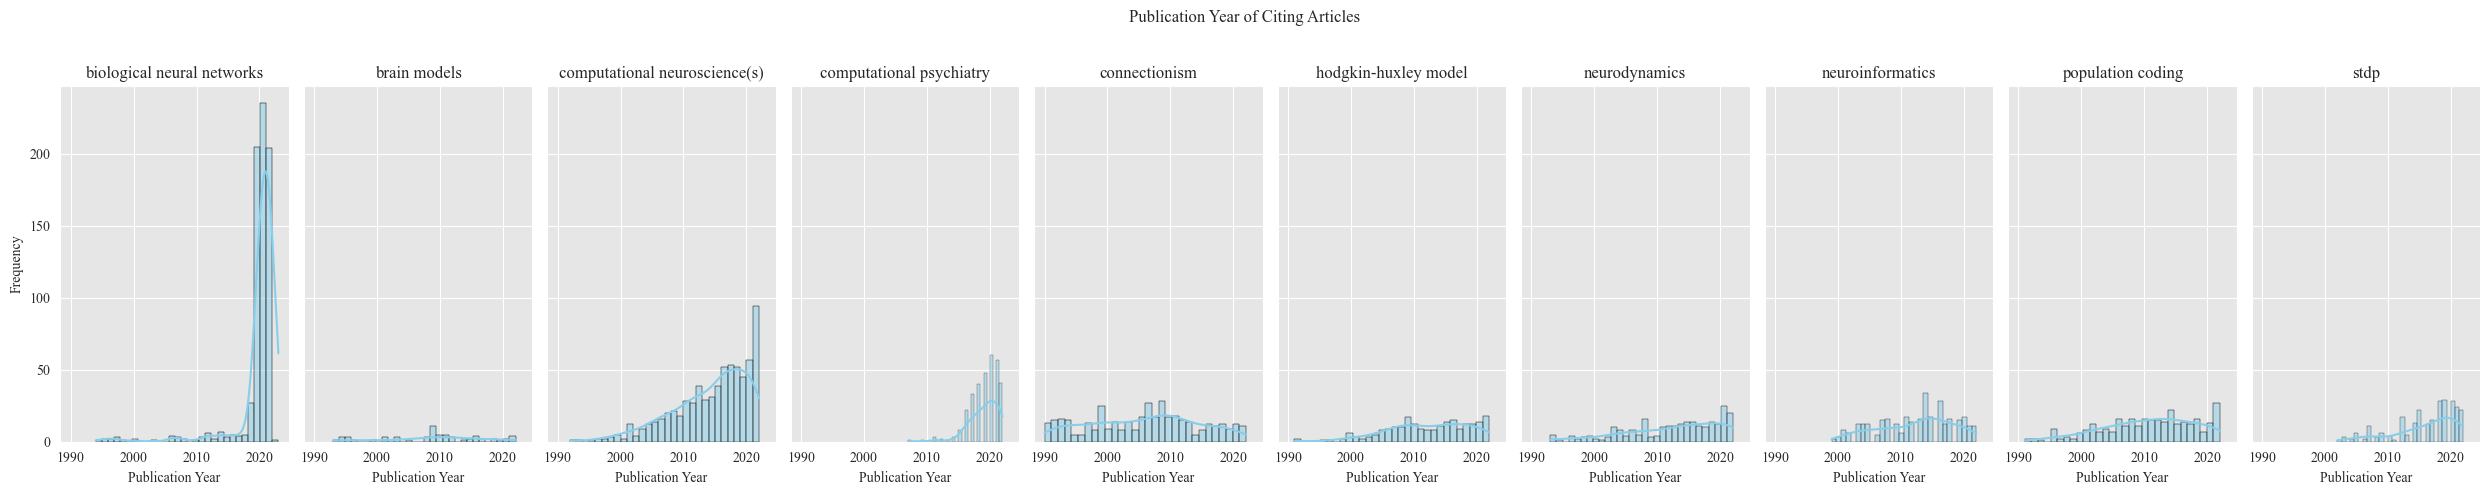

In [41]:
fig, axs = plt.subplots(1, 10, figsize=(25, 5), sharey=True, sharex=True)
fig.suptitle('Publication Year of Citing Articles')

for i, (name, df) in enumerate(df_list):
    sns.histplot(data=df, x='pubyear', bins=30, ax=axs[i], edgecolor='black', color='skyblue', kde=True)
    axs[i].set_title(name)
    axs[i].set_xlabel('Publication Year')
    axs[i].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Improves appearance slightly
plt.show()

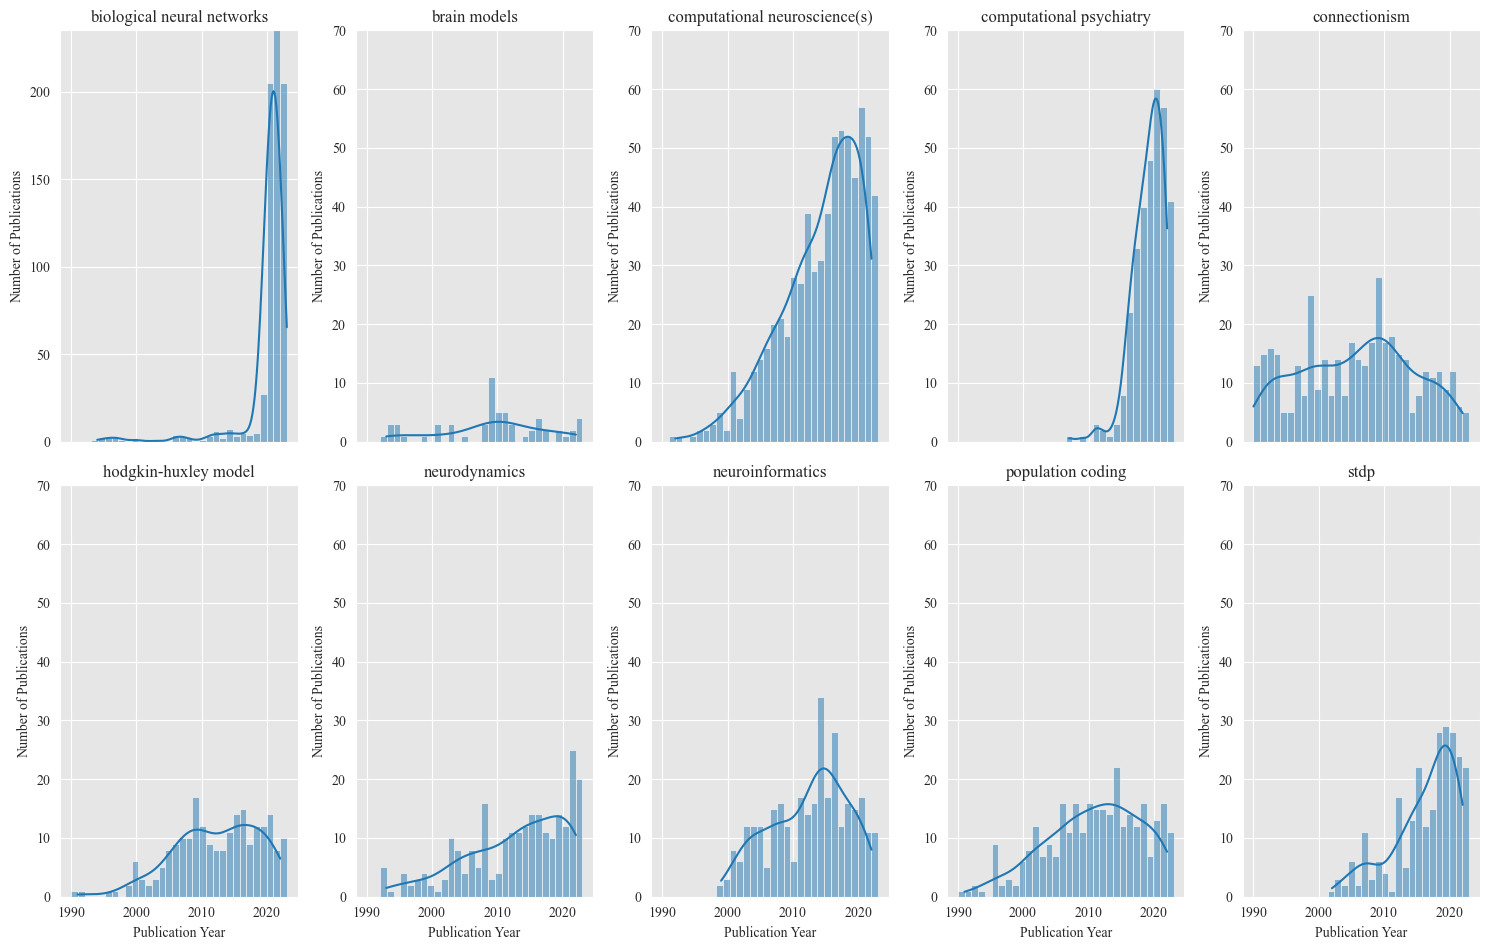

In [42]:
fig, axs = plt.subplots(2, 5, figsize=(15, 10), sharey=False, sharex=True)
#fig.suptitle('Publication Year of Citing Articles')

# Calculate global min and max
global_min = min(df['pubyear'].min() for _, df in df_list)
global_max = max(df['pubyear'].max() for _, df in df_list)

# Calculate bin edges
bins = np.linspace(global_min, global_max, 32+1)  # Add one to get 30 bins

# Plot background color and gridline color
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

max_count = 0  # Keep track of maximum frequency count

for i, (name, df) in enumerate(df_list):
    row = i // 5  # Row number: integer division by 5 will give 0 for first five plots, and 1 for the next five
    col = i % 5   # Col number: remainder when divided by 5 will cycle through 0-4 for all ten plots
    plot = sns.histplot(data=df, x='pubyear', bins=bins, ax=axs[row, col], edgecolor='white', kde=True) #KDE plot is showing the estimated trend of the distribution of publication years
    axs[row, col].set_title(name)
    axs[row, col].set_xlabel('Publication Year')
    axs[row, col].set_ylabel('Number of Publications')
    count = max([h.get_height() for h in plot.patches])  # Get max height among the bars
    max_count = max(max_count, count)  # Update maximum frequency count
    axs[row, col].grid(True, color='white')  # Grid lines

for ax_row in axs:  # Set all y-axis limits to be the same
    for ax in ax_row:
        ax.set_ylim(0, 70)
axs[0, 0].set_ylim(0,max_count)   # Set x-axis limits to be the same

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

In [43]:
bionn_counts = bionn['item_type'].value_counts()
brainm_counts = brainm['item_type'].value_counts()
compn_counts = compn['item_type'].value_counts()
compns_counts = compns['item_type'].value_counts()
compp_counts = compp['item_type'].value_counts()
conne_counts = conne['item_type'].value_counts()
hhm_counts = hhm['item_type'].value_counts()
ndyn_counts = ndyn['item_type'].value_counts()
ninfo_counts = ninfo['item_type'].value_counts()
popc_counts = popc['item_type'].value_counts()
stdp_counts = stdp['item_type'].value_counts()


df_counts = pd.DataFrame({
    'bionn': bionn_counts,
    'brainm': brainm_counts,
    'compn': compn_counts,
    'compns': compns_counts,
    'compp': compp_counts,
    'conne': conne_counts,
    'hhm': hhm_counts,
    'ndyn': ndyn_counts,
    'ninfo': ninfo_counts,
    'popc': popc_counts,
    'stdp': stdp_counts
}).fillna(0).astype(int)

# Display the table
print(df_counts)

                                   bionn  brainm  compn  compns  compp  conne  \
{"Editorial Material"}                 3       4     31       2     15     13   
{"Meeting Abstract"}                   1       0     19       0    113      1   
{"Proceedings Paper"}                 26      13    146       3      3     57   
{"Software Review"}                    1       0      0       0      0      0   
{Article,"Book Chapter"}               0       1      2       0      2      0   
{Article,"Data Paper"}                 0       0      0       0      0      0   
{Article,"Early Access"}              85       1      7       0      5      1   
{Article,"Proceedings Paper"}          8       2     30       2      1     28   
{Article,"Retracted Publication"}      0       0      0       0      1      0   
{Article}                            594      38    386       3    129    263   
{Biographical-Item}                    0       0      0       0      0      1   
{Correction}                

Including titles and abstracts searches for all the keywords

In [44]:
# Import files with keywords found in titles
bionn_titles = pd.read_csv(path + '/bionn_titles.csv')
brainm_titles = pd.read_csv(path + '/brainm_titles.csv')
compn_titles = pd.read_csv(path + '/compn_titles.csv')
compns_titles = pd.read_csv(path + '/compns_titles.csv')
compp_titles = pd.read_csv(path + '/compp_titles.csv')
conne_titles = pd.read_csv(path + '/conne_titles.csv')
hhm_titles = pd.read_csv(path + '/hhm_titles.csv')
ndyn_titles = pd.read_csv(path + '/ndyn_titles.csv')
ninfo_titles = pd.read_csv(path + '/ninfo_titles.csv')
popc_titles = pd.read_csv(path + '/popc_titles.csv')
stdp_titles = pd.read_csv(path + '/stdp_titles.csv')

In [45]:
# Import files with keywords found in abstracts
bionn_abs = pd.read_csv(path + '/bionn_abs.csv')
brainm_abs = pd.read_csv(path + '/brainm_abs.csv')
compn_abs = pd.read_csv(path + '/compn_abs.csv')
compns_abs = pd.read_csv(path + '/compns_abs.csv')
compp_abs = pd.read_csv(path + '/compp_abs.csv')
conne_abs = pd.read_csv(path + '/conne_abs.csv')
hhm_abs = pd.read_csv(path + '/hhm_abs.csv')
ndyn_abs = pd.read_csv(path + '/ndyn_abs.csv')
ninfo_abs = pd.read_csv(path + '/ninfo_abs.csv')
popc_abs = pd.read_csv(path + '/popc_abs.csv')
stdp_abs = pd.read_csv(path + '/stdp_abs.csv')

Merge the data sets and remove full dupicate rows

In [46]:
base_names = ['bionn', 'brainm', 'compn', 'compns', 'compp', 'conne', 'hhm', 'ndyn', 'ninfo', 'popc', 'stdp']

for base in base_names:
    # The globals() method returns a dictionary with all the global variables and symbols for the current program!
    kw = globals()[base]
    titles = globals()[base + '_titles']
    abst = globals()[base + '_abs']
    
    # merge dfs, remove duplicates, and reset index
    combined = pd.concat([kw, titles, abst], ignore_index=True)
    combined = combined.drop_duplicates()
    combined = combined.reset_index(drop=True)
    
    # assign combined dataframe back to base variable
    globals()[base] = combined

Merge compn and compns

In [47]:
compn = pd.concat([compn, compns], ignore_index=True)
compn = compn.drop_duplicates()
compn = compn.reset_index(drop=True)

Number of publications in total

In [48]:
base_names = ['bionn', 'brainm', 'compn', 'compp', 'conne', 'hhm', 'ndyn', 'ninfo', 'popc', 'stdp']
df_lengths = []

for name in base_names:
    length = len(globals()[name])
    df_lengths.append((name, length))

length_df = pd.DataFrame(df_lengths, columns=['DataFrame', 'Length'])

print(length_df)

  DataFrame  Length
0     bionn    1264
1    brainm     474
2     compn    1511
3     compp     397
4     conne     750
5       hhm     221
6      ndyn     785
7     ninfo     595
8      popc     720
9      stdp    1141


Earliest and latest publication years for each keyword

In [49]:
df_years = []

for name in base_names:
    min_year = globals()[name]['pubyear'].min()
    max_year = globals()[name]['pubyear'].max()
    df_years.append((name, min_year, max_year))

year_range_df = pd.DataFrame(df_years, columns=['DataFrame', 'Min_Year', 'Max_Year'])

print(year_range_df)

  DataFrame  Min_Year  Max_Year
0     bionn      1991      2023
1    brainm      1990      2022
2     compn      1991      2022
3     compp      2007      2022
4     conne      1990      2022
5       hhm      1991      2022
6      ndyn      1991      2022
7     ninfo      1995      2022
8      popc      1989      2022
9      stdp      2000      2022


Most cited publications

In [50]:
df_max_cit = []

for name in base_names:
    df = globals()[name]
    max_cit_row = df[df['cit_all_years'] == df['cit_all_years'].max()]
    max_cit_info = (name, max_cit_row['item_title'].values[0], max_cit_row['first_author'].values[0], max_cit_row['cit_all_years'].values[0])
    df_max_cit.append(max_cit_info)

max_cit_df = pd.DataFrame(df_max_cit, columns=['DataFrame', 'Item_Title', 'First_Author', 'Max_Citations'])

pd.set_option('display.max_colwidth', None)

#print(max_cit_df)

pd.reset_option('display.max_colwidth') #reset to default

In [51]:
print(max_cit_df)

  DataFrame                                         Item_Title  \
0     bionn             Artificial neural networks: A tutorial   
1    brainm  Predictive coding under the free-energy principle   
2     compn  Perceiving is believing: a Bayesian approach t...   
3     compp                           Computational psychiatry   
4     conne  CHARACTERISTICS OF DISSOCIABLE HUMAN LEARNING-...   
5       hhm  A model of the action potential and underlying...   
6      ndyn  Affective consciousness: Core emotional feelin...   
7     ninfo  Behavioral Interpretations of Intrinsic Connec...   
8      popc  Neural correlations, population coding and com...   
9      stdp                     A theory of cortical responses   

        First_Author  Max_Citations  
0           Jain, AK           1258  
1   Friston, Karl J.            607  
2  Fletcher, Paul C.            766  
3  Montague, P. Read            383  
4         SHANKS, DR            765  
5       Lindblad, DS            140  
6      

Plots of the number of publications per year

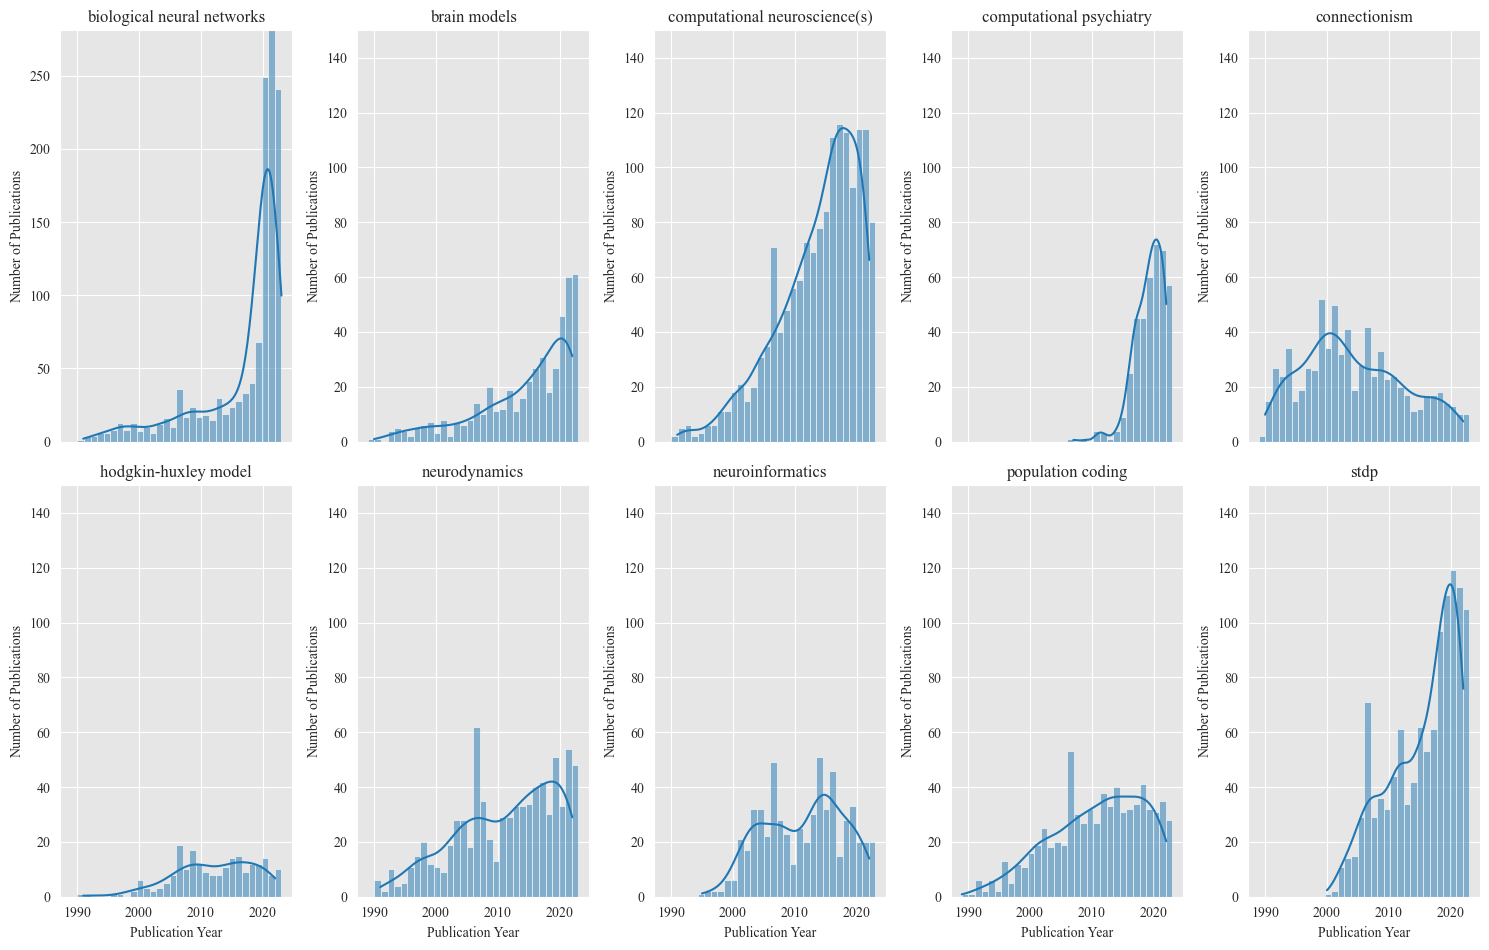

In [52]:
mpl.rcParams['font.serif'] = 'Times New Roman' # Not sure why this has to be entered again
plt.rcParams['font.family'] = 'serif'

df_list = [
    ('biological neural networks', bionn),
    ('brain models', brainm),
    ('computational neuroscience(s)', compn),
    #('compns', compns),
    ('computational psychiatry', compp),
    ('connectionism', conne),
    ('hodgkin-huxley model', hhm),
    ('neurodynamics', ndyn),
    ('neuroinformatics', ninfo),
    ('population coding', popc),
    ('stdp', stdp)
]

fig, axs = plt.subplots(2, 5, figsize=(15, 10), sharey=False, sharex=True)
#fig.suptitle('Publication Year of Citing Articles')

# Calculate the global min and max
global_min = min(df['pubyear'].min() for _, df in df_list)
global_max = max(df['pubyear'].max() for _, df in df_list)

# Calculate the bin edges
bins = np.linspace(global_min, global_max, 32+1)  # Add one to get 30 bins

# Change the plot background color and gridline color
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

max_count = 0  # Keep track of maximum frequency count

for i, (name, df) in enumerate(df_list):
    row = i // 5  # Row number: integer division by 5 will give 0 for first five plots, and 1 for the next five
    col = i % 5   # Column number: remainder when divided by 5 will cycle through 0-4 for all ten plots
    plot = sns.histplot(data=df, x='pubyear', bins=bins, ax=axs[row, col], edgecolor='white', kde=True)
    axs[row, col].set_title(name)
    axs[row, col].set_xlabel('Publication Year')
    axs[row, col].set_ylabel('Number of Publications')
    count = max([h.get_height() for h in plot.patches])  # Get max height among the bars
    max_count = max(max_count, count)  # Update maximum frequency count
    axs[row, col].grid(True, color='white')  # Add grid lines

for ax_row in axs:  # Set all y-axis limits to be the same
    for ax in ax_row:
        ax.set_ylim(0, 150)#max_count)
axs[0,0].set_ylim(0,max_count)  # Set x-axis limits for all plots
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()


Find overlap to computational neuroscience

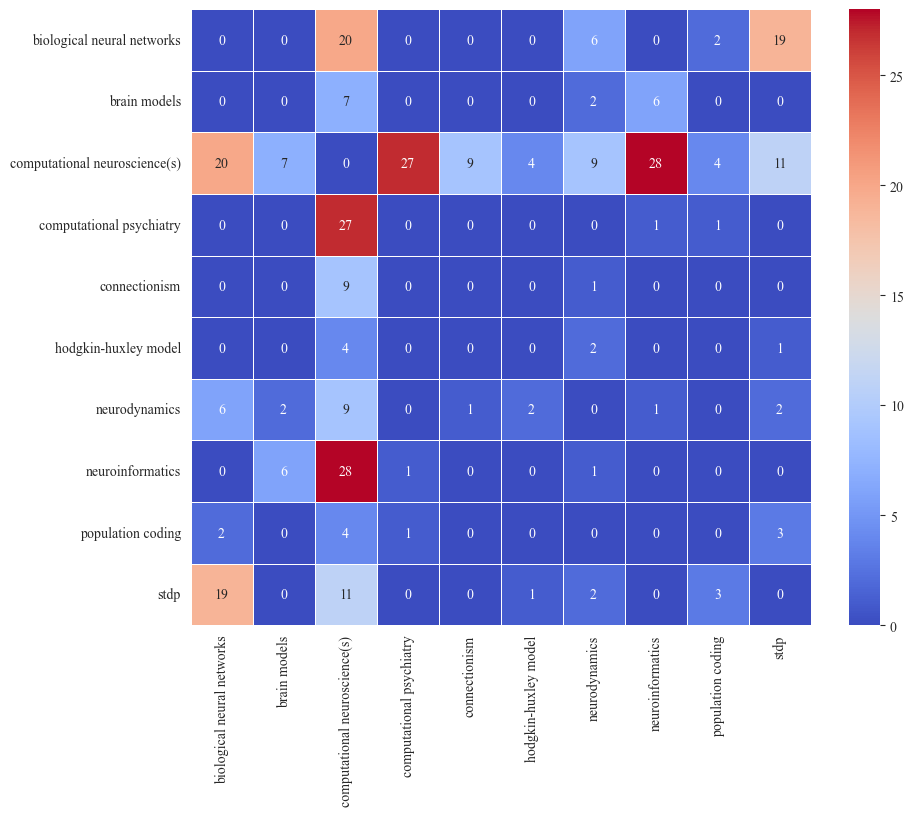

In [53]:
mpl.rcParams['font.serif'] = 'Times New Roman' # Not sure why this has to be entered again
plt.rcParams['font.family'] = 'serif'

overlap_matrix = pd.DataFrame(0, index=[name for name, _ in df_list], columns=[name for name, _ in df_list])

# Calculate the number of overlapping rows between each pair of data frames
for i in range(len(df_list)):
    for j in range(i, len(df_list)):
        overlap = len(set(df_list[i][1]['item_title'].unique()).intersection(set(df_list[j][1]['item_title'].unique())))
        overlap_matrix.iloc[i, j] = overlap
        overlap_matrix.iloc[j, i] = overlap  # The matrix is symmetric

np.fill_diagonal(overlap_matrix.values, 0)
# Draw the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(overlap_matrix, annot=True, fmt="d", linewidths=.5, cmap='coolwarm')
plt.show()

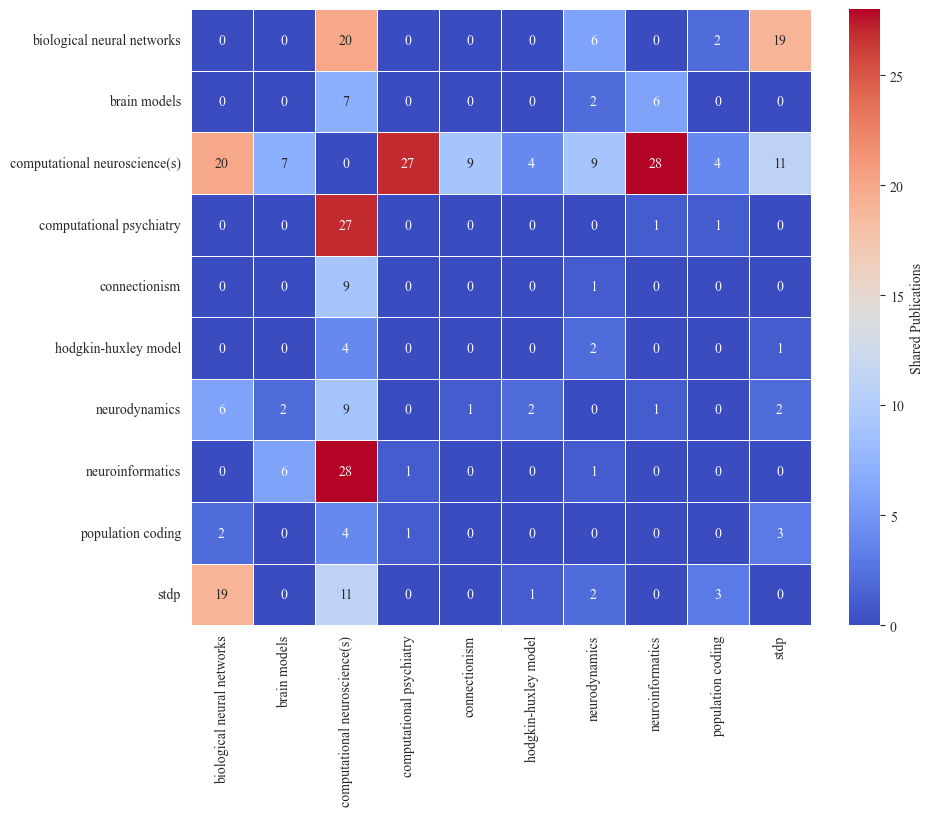

In [54]:
overlap_matrix = pd.DataFrame(0, index=[name for name, _ in df_list], columns=[name for name, _ in df_list])

# number of overlapping rows between each pair of data frames
for i in range(len(df_list)):
    for j in range(i, len(df_list)):
        overlap = len(set(df_list[i][1]['item_title'].unique()).intersection(set(df_list[j][1]['item_title'].unique())))
        overlap_matrix.iloc[i, j] = overlap
        overlap_matrix.iloc[j, i] = overlap  # matrix is symmetric

np.fill_diagonal(overlap_matrix.values, 0)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(overlap_matrix, annot=True, fmt="d", linewidths=.5, cmap='coolwarm')

colorbar = ax.collections[0].colorbar # Get colorbar to change it
colorbar.set_label('Shared Publications') # Add the colorbar label

plt.show()

In [55]:
print(overlap_matrix)

                               biological neural networks  brain models  \
biological neural networks                              0             0   
brain models                                            0             0   
computational neuroscience(s)                          20             7   
computational psychiatry                                0             0   
connectionism                                           0             0   
hodgkin-huxley model                                    0             0   
neurodynamics                                           6             2   
neuroinformatics                                        0             6   
population coding                                       2             0   
stdp                                                   19             0   

                               computational neuroscience(s)  \
biological neural networks                                20   
brain models                                  

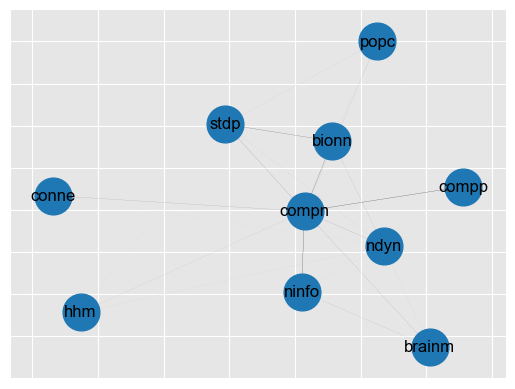

In [56]:
import networkx as nx
#import matplotlib.pyplot as plt

overlap_matrix = pd.DataFrame({
    'bionn': [1234, 0, 20, 0, 0, 0, 6, 0, 2, 19],
    'brainm': [0, 463, 7, 0, 0, 0, 2, 6, 0, 0],
    'compn': [20, 7, 1477, 27, 9, 4, 9, 28, 4, 11],
    'compp': [0, 0, 27, 396, 0, 0, 0, 1, 1, 0],
    'conne': [0, 0, 9, 0, 716, 0, 1, 0, 0, 0],
    'hhm': [0, 0, 4, 0, 0, 221, 2, 0, 0, 1],
    'ndyn': [6, 2, 9, 0, 1, 2, 722, 1, 0, 2],
    'ninfo': [0, 6, 28, 1, 0, 0, 1, 522, 0, 0],
    'popc': [2, 0, 4, 1, 0, 0, 0, 0, 720, 3],
    'stdp': [19, 0, 11, 0, 0, 1, 2, 0, 3, 947]
}, index=['bionn', 'brainm', 'compn', 'compp', 'conne', 'hhm', 'ndyn', 'ninfo', 'popc', 'stdp'])

G = nx.Graph()

for i in overlap_matrix.columns:
    for j in overlap_matrix.columns:
        if i != j:  # We don't need to add a self-loop
            G.add_edge(i, j, weight=overlap_matrix.loc[i, j])

pos = nx.spring_layout(G)  # positions for all nodes


nx.draw_networkx_nodes(G, pos, node_size=700) # nodes


for (u, v, d) in G.edges(data=True): # edges
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=d['weight']/200)


nx.draw_networkx_labels(G, pos, font_size=12)

plt.show()

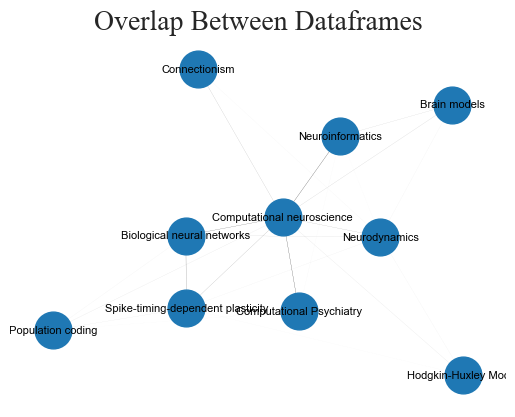

In [57]:

overlap_matrix = pd.DataFrame({
    'Biological neural networks': [1234, 0, 20, 0, 0, 0, 6, 0, 2, 19],
    'Brain models': [0, 463, 7, 0, 0, 0, 2, 6, 0, 0],
    'Computational neuroscience': [20, 7, 1477, 27, 9, 4, 9, 28, 4, 11],
    'Computational Psychiatry': [0, 0, 27, 396, 0, 0, 0, 1, 1, 0],
    'Connectionism': [0, 0, 9, 0, 716, 0, 1, 0, 0, 0],
    'Hodgkin-Huxley Model': [0, 0, 4, 0, 0, 221, 2, 0, 0, 1],
    'Neurodynamics': [6, 2, 9, 0, 1, 2, 722, 1, 0, 2],
    'Neuroinformatics': [0, 6, 28, 1, 0, 0, 1, 522, 0, 0],
    'Population coding': [2, 0, 4, 1, 0, 0, 0, 0, 720, 3],
    'Spike-timing-dependent plasticity': [19, 0, 11, 0, 0, 1, 2, 0, 3, 947]
}, index=['Biological neural networks', 'Brain models', 'Computational neuroscience', 'Computational Psychiatry', 
          'Connectionism', 'Hodgkin-Huxley Model', 'Neurodynamics', 'Neuroinformatics', 
          'Population coding', 'Spike-timing-dependent plasticity'])

G = nx.Graph()

for i in overlap_matrix.columns:
    for j in overlap_matrix.columns:
        if i != j:  # no need to add a self-loop
            G.add_edge(i, j, weight=overlap_matrix.loc[i, j])

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700) #, node_color='blue'

# edges
for (u, v, d) in G.edges(data=True):
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=d['weight']/200, edge_color='black')

# labels
nx.draw_networkx_labels(G, pos, font_size=8, font_family='Arial')

plt.axis('off') # Turn off the axis
plt.title('Overlap Between Dataframes', fontsize=20)
plt.show()

nx.write_gexf(G, "overlap_graph.gexf")